# Pyber Ride Sharing

### Analysis

- Rural areas have fewer drivers and this might be causing a higher avg fare but this might not be a direct result and further analysis is needed to arrive a more definite relation.
- Urban areas have lower avg fares, higher total fare, higher driver count, higher riders so it might worth exploring in detail if a relation exists between the them
- Urban areas account for almost 2/3rd of all the rides taken and almost 75% of all the drivers

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read the files
ride_df = pd.read_csv("ride_data.csv")
city_df = pd.read_csv("city_data.csv")

In [3]:
# total fare per city
ridegrpbycity = ride_df.groupby("city",as_index = None)
ridegrp_df = pd.DataFrame(ridegrpbycity["fare"].sum())

In [4]:
# Ride count per city
ridercount = ridegrpbycity["ride_id"].count()
ridegrp_df["ridecount"] = ridercount["ride_id"]

In [5]:
# Average fare per city
fareavg = ridegrpbycity["fare"].mean()
ridegrp_df["avgfare"] = fareavg["fare"]

In [6]:
# group the city data if we have multiple rows for same city
citygrp = city_df.groupby("city",as_index = None)
citygrp_df = citygrp.sum()

# Merge the aggregate from above with the original city data
citygrp_df1 = pd.merge(city_df,citygrp_df, on = "city")

# drop the redundant city rows
citygrp_df1.drop(citygrp_df1.loc[(citygrp_df1["city"]=="Port James") & (citygrp_df1["driver_count_x"] == 3),:].index,inplace = True)

In [7]:
citygrp_df1 = citygrp_df1.rename(columns={"driver_count_y": "driver_count"})
del citygrp_df1["driver_count_x"]

In [8]:
# Merge the cleaned city data and ride data
combined_df = pd.merge(ridegrp_df, citygrp_df1, on="city")

In [9]:
# split out the data by city type
urban_df = combined_df.loc[combined_df["type"]=="Urban",:]
rural_df = combined_df.loc[combined_df["type"]=="Rural",:]
suburban_df = combined_df.loc[combined_df["type"]=="Suburban",:]

## Bubble plot of Ride Sharing Data (using Matplotlib)

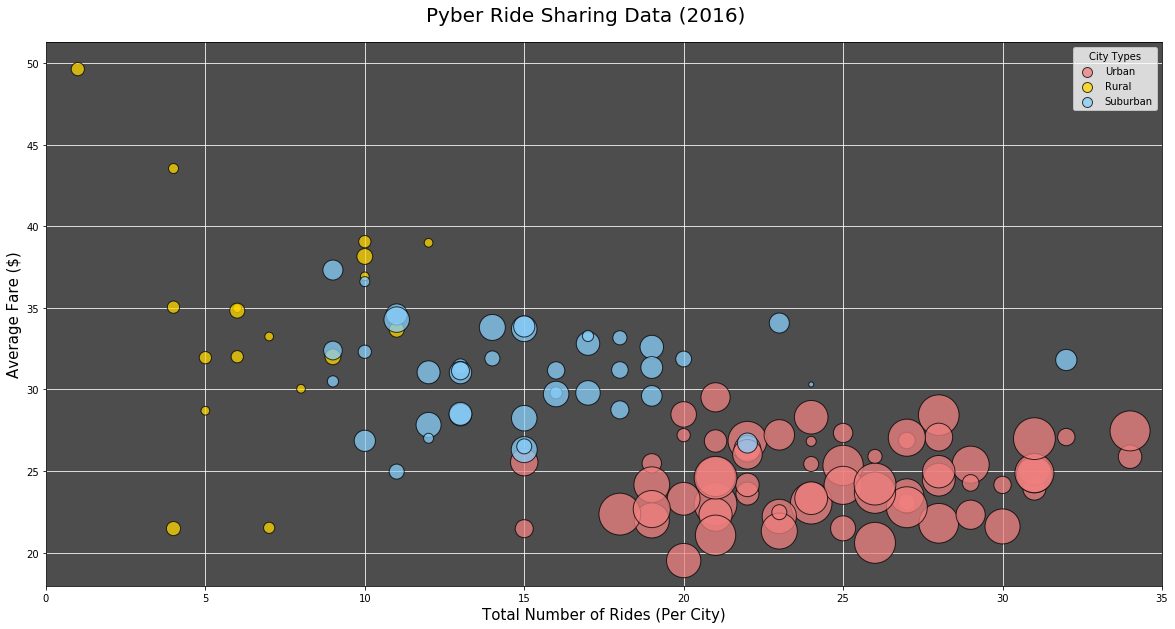

In [10]:
fig, ax1 = plt.subplots(figsize=(20,10))
fig.suptitle("Pyber Ride Sharing Data (2016)",fontsize=20,y=.93)
ax1.set_xlabel("Total Number of Rides (Per City)")
ax1.set_ylabel("Average Fare ($)")
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
plt.xlim(0, 35)
ax1.set_axisbelow(True)
ax1.patch.set_facecolor('.3')

ax1.scatter(urban_df["ridecount"], urban_df["avgfare"], s=urban_df["driver_count"]*25, edgecolors='black',c='lightcoral', label = 'Urban',alpha=.75)
ax1.scatter(rural_df["ridecount"], rural_df["avgfare"], s=rural_df["driver_count"]*25, edgecolors='black', c='gold', label = 'Rural',alpha=.75)
ax1.scatter(suburban_df["ridecount"], suburban_df["avgfare"], s=suburban_df["driver_count"]*25, edgecolors='black',c='lightskyblue', label = 'Suburban',alpha=.75)
plt.grid(color='w')
lgnd = plt.legend(title='City Types')
for handle in lgnd.legendHandles:
    handle.set_sizes([100.0])

In [11]:
combined_df_grp = combined_df.groupby("type",as_index=None)
combined_grpdf =combined_df_grp.sum()

In [12]:
# Pie chart labels
labels = combined_grpdf["type"]

# Pie chart values
sizes = combined_grpdf["fare"]

# Pie chart colors
colors = ["gold","lightskyblue","lightcoral" ]

# separate the "Urban" section
explode = (0.0, 0.0, 0.05)

## Total Fares by City Type

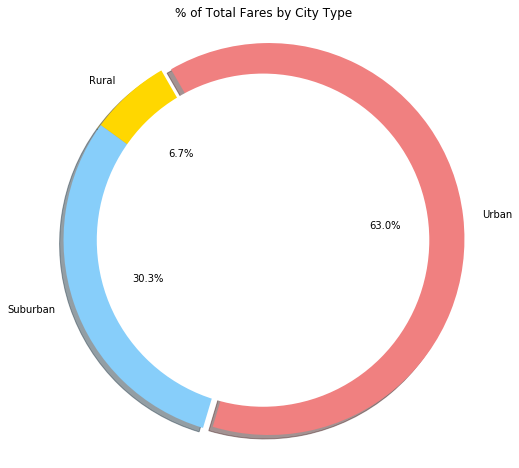

In [13]:
# donut chart (pie chart with center cut out)
fig = plt.gcf()
centre_circle = plt.Circle((.02,-0.0),0.85,fc='white')
fig.gca().add_artist(centre_circle)

# Create pie chart
fig.set_size_inches(8,8)
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%",explode=explode, shadow=True,startangle=120)
plt.title("% of Total Fares by City Type")

# pie chart with equal axes
plt.axis("equal")
plt.show()

In [14]:
# pie chart labels
labels = combined_grpdf["type"]

# pie chart values
sizes = combined_grpdf["ridecount"]

# pie chart colors 
colors = ["gold","lightskyblue","lightcoral" ]

# seperate the "Urban" section
explode = (0, 0, 0.05)

## Total Rides by City Type

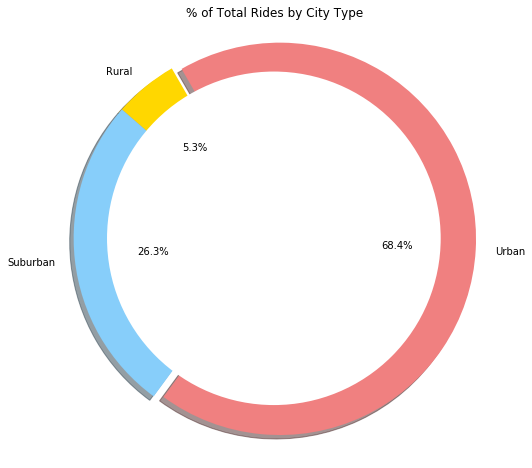

In [15]:
# donut chart (pie chart with center cut out)
fig = plt.gcf()
centre_circle = plt.Circle((.02,-0.0),0.85,fc='white')
fig.gca().add_artist(centre_circle)

# Create pie chart
fig.set_size_inches(8,8)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=120)
plt.title("% of Total Rides by City Type")

# pie chart with equal axes
plt.axis("equal")
plt.show()

In [16]:
# pie chart labels
labels = combined_grpdf["type"]

# pie chart values
sizes = combined_grpdf["driver_count"]

# pie chart colors
colors = ["gold","lightskyblue","lightcoral" ]

# seperate the "Urban" section
explode = (0, 0, 0.05)

## Total Drivers by City Type

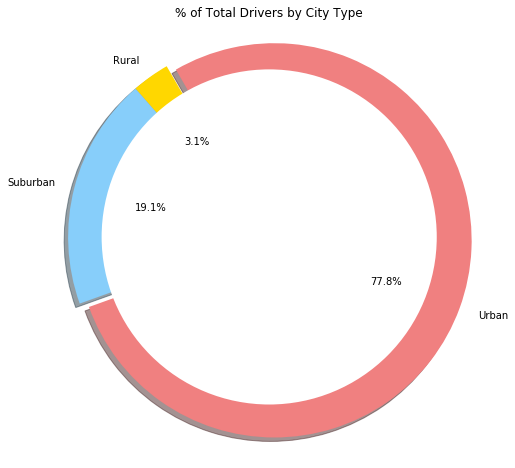

In [17]:
# donut chart (pie chart with center cut out)
fig = plt.gcf()
centre_circle = plt.Circle((.02,-0.0),0.85,fc='white')
fig.gca().add_artist(centre_circle)

# Create pie chart
fig.set_size_inches(8,8)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=120)
plt.title("% of Total Drivers by City Type")

# pie chart with equal axes
plt.axis("equal")
plt.show()

## Bubble plot of Ride Sharing Data (using Seaborn)

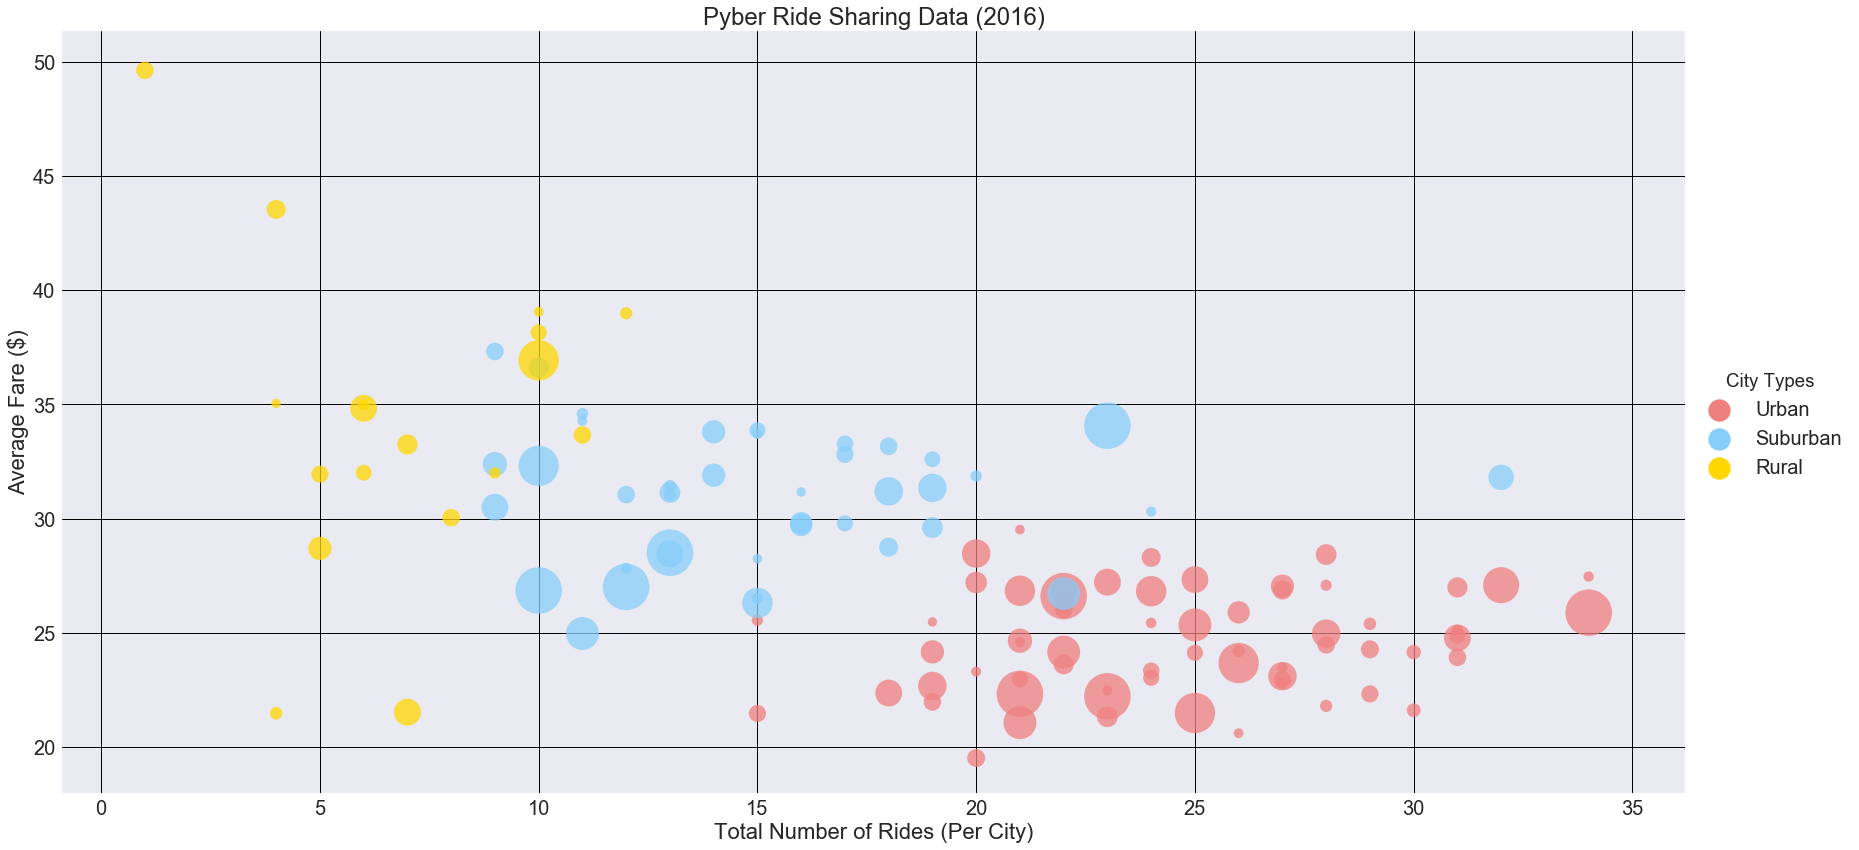

In [18]:
sns.set(style="dark",palette='pastel',font_scale=2)
g=sns.lmplot(x="ridecount", y="avgfare", data=combined_df,fit_reg=False, hue="type",size=12, aspect=2,scatter_kws={"s": (1/combined_df["driver_count"])*(6500),"edgecolors":sns.xkcd_rgb["black"],"alpha":0.75},palette=dict(Urban="lightcoral", Rural="gold",Suburban="lightskyblue"))
g._legend.set_title("City Types")
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [500]
ax = plt.gca()
ax.set_title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(color='black')
plt.show()